### Problem Statement:

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.


The Toxic Pesticides:

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df_train = pd.read_excel(r"C:\Users\Lokesh Bisen\Downloads\train_agriculture.xlsx")
df_test = pd.read_excel(r"C:\Users\Lokesh Bisen\Downloads\test_agriculture.xlsx")

### Exploratry DataAnalysis (EDA) :

In [3]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
df_train.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0
4598,F00008083,2267,0,1,2,10,33.0,17,2,0


In [6]:
df_test.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1
1198,F00003150,1212,0,1,2,15,NaN,20,3


In [7]:
df_train.shape

(4599, 10)

In [8]:
df_test.shape

(1199, 9)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [11]:
df_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [12]:
df_test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [13]:
df_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [14]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

#### Observations:

1. Dataset based on agriculture problem where lebel are multiclass classification
   problem.
2.ID columns is no use hence we can drop.
3."Number_Weeks_Used" has null values.

### Univariate Analysis:

'Uni' refers to one, and 'variate' means variable, the word univariate refers to the analysis involving a single variable. The analysis can include summarization, measurements of dispersion, measurements of central tendency, and visualizations like histograms, distributions, frequency tables, bar charts, pie charts, boxplots, etc. The idea is simply that the data must contain a single variable, and it could be a categorical or numeric variable. Let's start our Univariate analysis by discussing some basic methods.

In [15]:
# checking the uniquer values in each columns 
for col in df_train:
    print(f'{col} : {df_train[col].unique()}')

ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']
Estimated_Insects_Count : [ 188  209  257  342  448  577  731 1132 1212 1575 1785 2138 2401 2999
 3516 3895 4096  150  151  168  232  231  256  283  312  311  375  411
  410  488  489  531  626  625  677  732  789  790  851  850  915  916
  984 1056 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267
 2402 2542 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169 3515
 4097]
Crop_Type : [1 0]
Soil_Type : [0 1]
Pesticide_Use_Category : [1 3 2]
Number_Doses_Week : [ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
Number_Weeks_Used : [ 0. nan 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35.
 32. 27. 16. 31. 33. 34. 39. 38. 42. 40. 41. 36. 44. 37. 46. 45. 47. 43.
 50. 10. 49. 53. 48. 51. 54. 52. 55. 56. 61. 18. 57. 62. 60. 63. 66. 59.
 64. 13.  7.  5. 12.  6.  9. 58. 11. 65.]
Number_Weeks_Quit : [ 0  1  9  4 13  3 14  6  2 12 15 10  8 11  7  5 17 18 16 20 21 19 22 24
 23

In [16]:
df_train[df_train['Number_Doses_Week']==0] # checking the 0 values in Number_Doses_Week col 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [17]:
df_train[df_train['Number_Weeks_Used']==0] ## checking the 0 values in Number_Doses_Week col 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2
11,F00000023,1575,0,0,1,0,0.0,0,1,1
12,F00000024,1575,0,1,1,0,0.0,0,2,1


In [18]:
df_train.columns # checking the columns name

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='Count'>

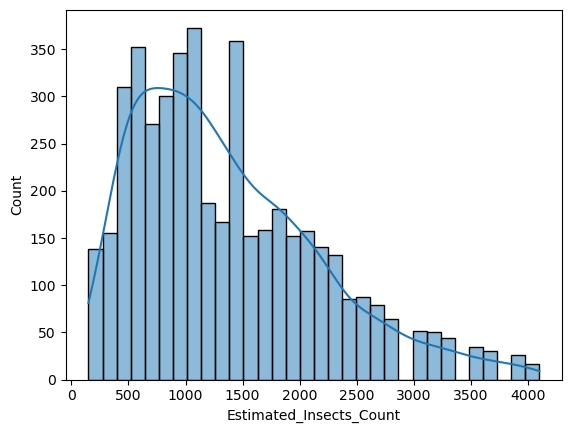

In [19]:
sns.histplot(data=df_train['Estimated_Insects_Count'],kde=True)

Above histogram shows data of insects in per squre meter.

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

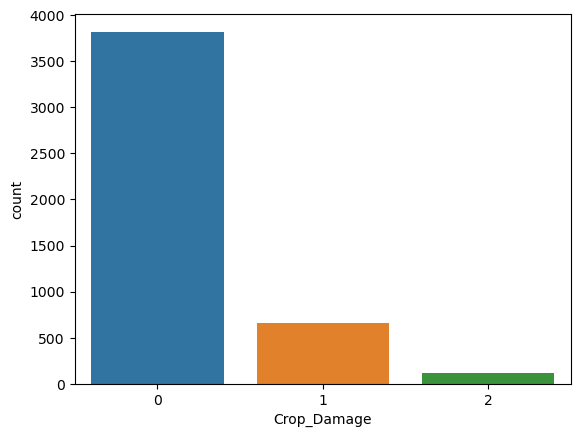

In [20]:
sns.countplot(x=df_train['Crop_Damage'])

Above countplot shows count of "alive==0" & "damage due to other reason==1" and "damage due to pestiside==2. here we can see out output data is unbalanced. "alive" count is more then as compare to other output value.

### Bivariate & Multivariate Analysis :

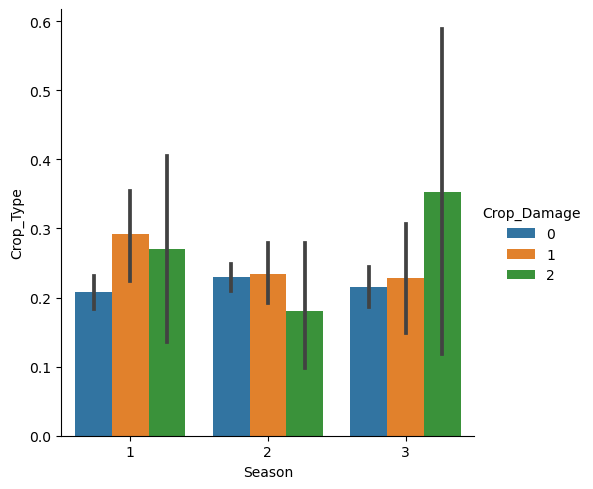

In [21]:
sns.catplot(x = 'Season', y = 'Crop_Type', hue = 'Crop_Damage', kind = 'bar', data = df_train)

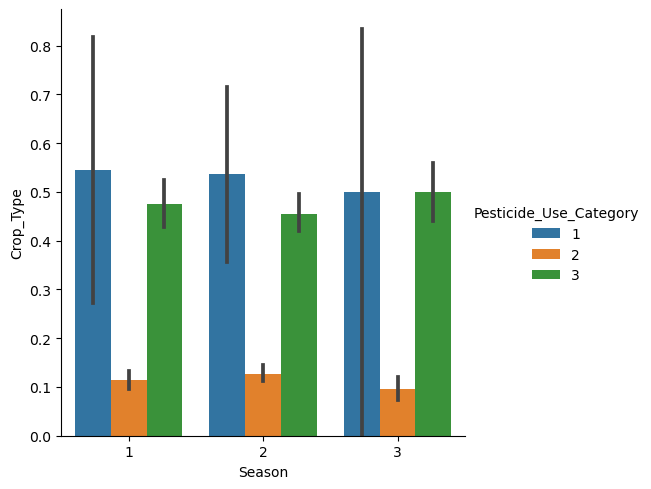

In [22]:
sns.catplot(x = 'Season', y = 'Crop_Type', hue = 'Pesticide_Use_Category', kind = 'bar', data = df_train)

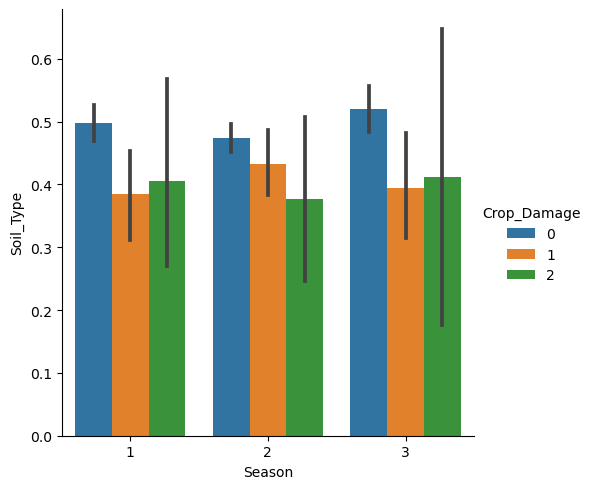

In [23]:
sns.catplot(x = 'Season', y = 'Soil_Type', hue = 'Crop_Damage', kind = 'bar', data = df_train)

### Data Cleaning :

In [24]:
df_train.isnull().sum()/100 #checking the presentage of missing data

ID                         0.00
Estimated_Insects_Count    0.00
Crop_Type                  0.00
Soil_Type                  0.00
Pesticide_Use_Category     0.00
Number_Doses_Week          0.00
Number_Weeks_Used          4.42
Number_Weeks_Quit          0.00
Season                     0.00
Crop_Damage                0.00
dtype: float64

In [25]:
df_test.isnull().sum()/100 #checking the presentage of missing data

ID                         0.00
Estimated_Insects_Count    0.00
Crop_Type                  0.00
Soil_Type                  0.00
Pesticide_Use_Category     0.00
Number_Doses_Week          0.00
Number_Weeks_Used          1.19
Number_Weeks_Quit          0.00
Season                     0.00
dtype: float64

Since missing value data has only 4% of the data hence I am going to remove all null values 

In [26]:
df_train = df_train.dropna()

In [27]:
df_test = df_test.dropna()

In [28]:
df_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [29]:
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [30]:
df_train.drop(['ID'],axis=1,inplace=True)

In [31]:
df_test.drop(columns='ID',axis=1,inplace=True)

In [32]:
df_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [33]:
df_train.shape

(4157, 9)

#### Outliars detecting and removel :

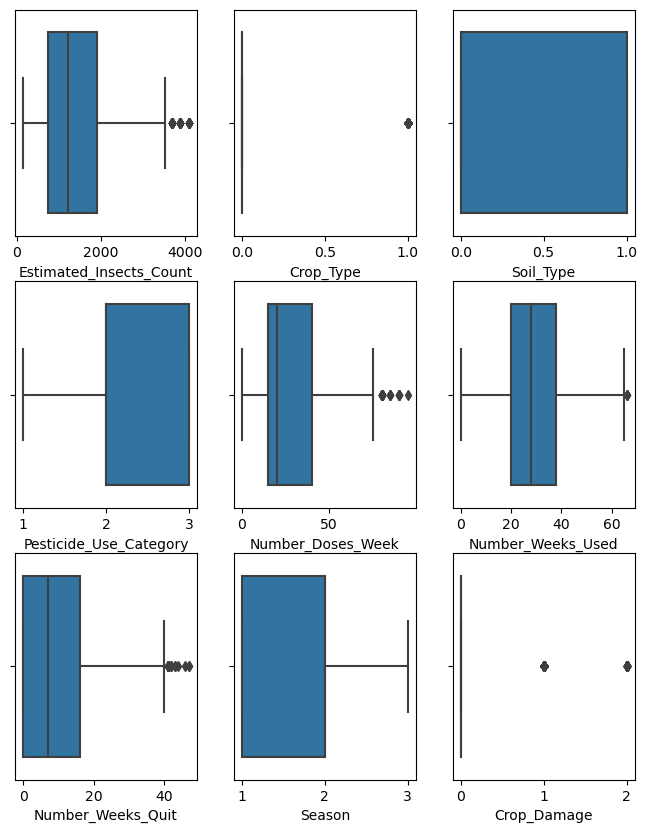

In [34]:
plt.figure(figsize=(8,10))
pltnum =1
for col in df_train:
    if pltnum<=9:
        plt.subplot(3,3,pltnum)
        sns.boxplot(df_train[col])
        plt.xlabel(col)
        pltnum+=1
plt.show()

in above boxplot"Estimated_Insects_Count" ,"Number_Doses_Week" and "Number_Weeks_Quit" shows anomlies. however in real time 
it does not seems outliars. so as of now I am not removing outliars. later I will check without remoiving outliars if it gives me good result then i will keep as it is else I will remove.

In [35]:
#Checking corelation between depndenet and indepndenet features and among the indepndenet features.

In [36]:
corrrelation = df_train.corr()

<AxesSubplot:>

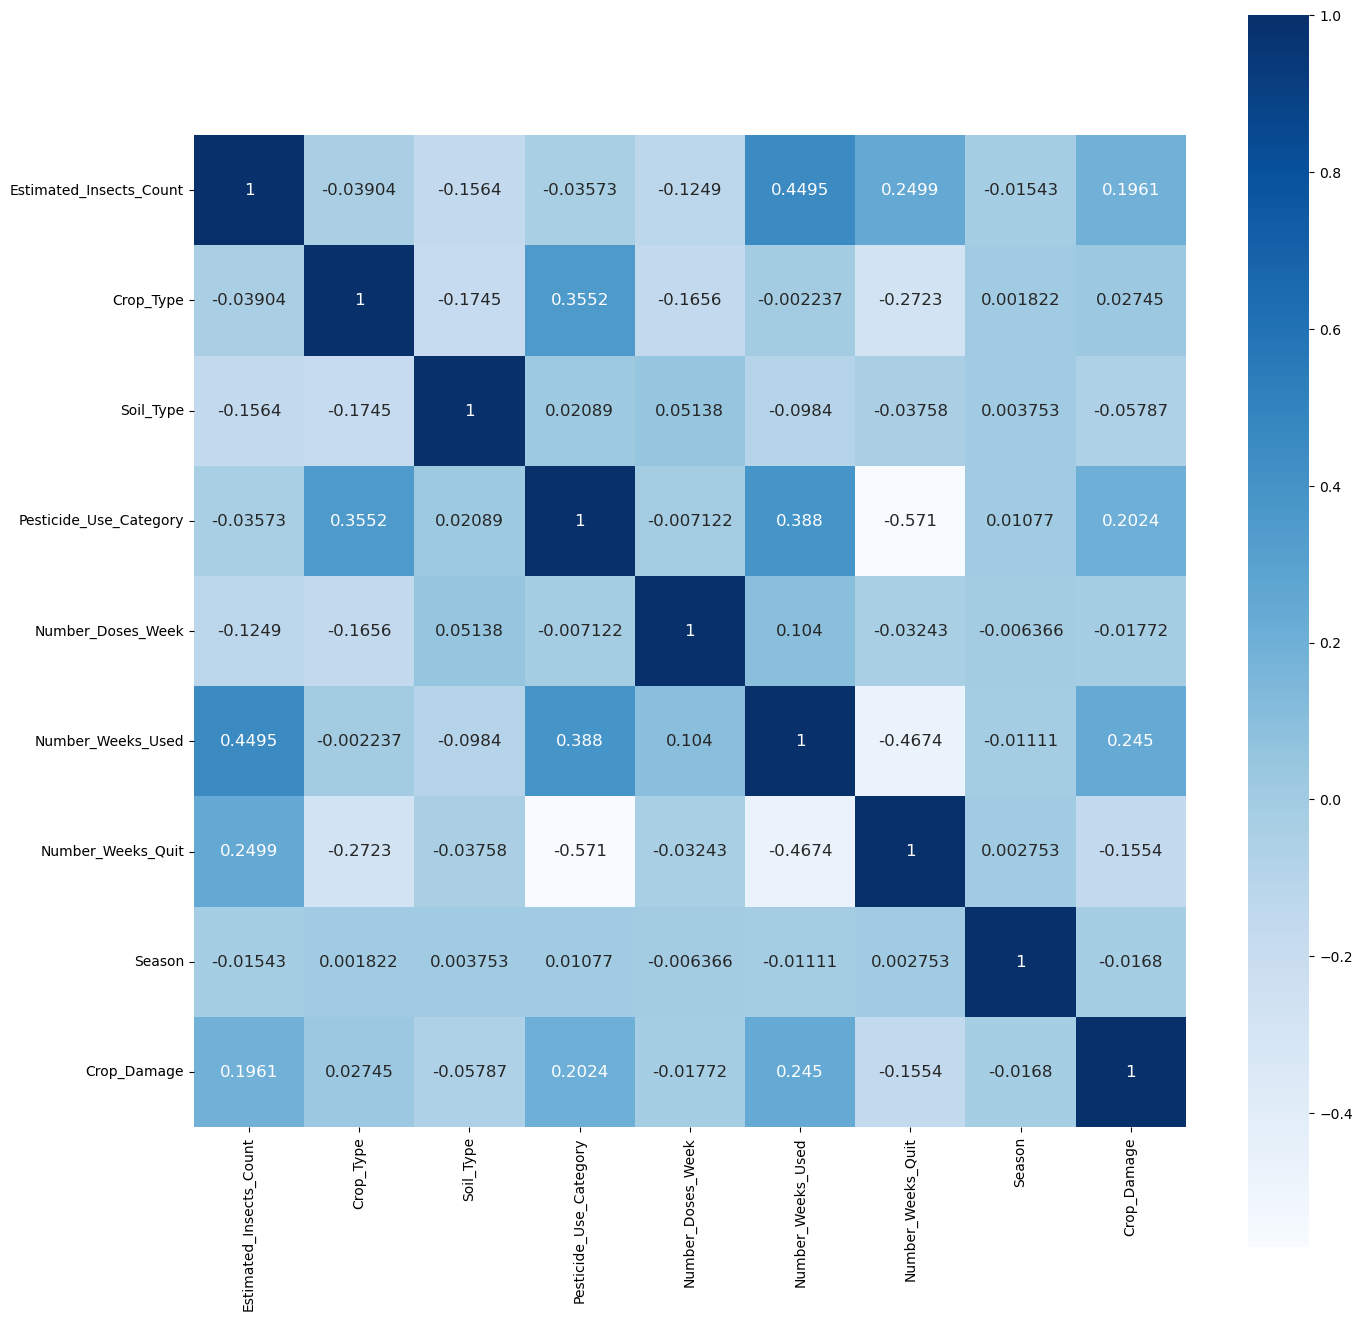

In [37]:
plt.figure(figsize=(16,16))
sns.heatmap(corrrelation,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

### Feature Engeneering !

In [38]:
# importing StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler 

# importing train test split
from sklearn.model_selection import train_test_split

#column transformer and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
# Dividing the features and label
X = df_train.drop(['Crop_Damage'],axis=1)
y = df_train['Crop_Damage']

In [40]:
X.shape

(4157, 8)

In [41]:
y.shape

(4157,)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)# split into train test

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3117, 8)
(1040, 8)
(3117,)
(1040,)


### Model Building Using Pipeline

In [44]:
tf1 = ColumnTransformer([('scale',StandardScaler(),slice(0,7))],remainder='passthrough')

In [45]:
tf_lr2 = LogisticRegression()
tf_knn3 = KNeighborsClassifier()
tf_dt4 = DecisionTreeClassifier()
tf_rf5 = RandomForestClassifier()

In [46]:
pipe_lr = Pipeline([('tf_scale',tf1),('pipe_lr',tf_lr2)])
pipe_knn = Pipeline([('tf_scale',tf1),('pipe_knn',tf_knn3)])
pipe_dt = Pipeline([('tf_scale',tf1),('pipe_knn',tf_dt4)])
pipe_rf = Pipeline([('tf_scale',tf1),('pipe_rf',tf_rf5)])

In [47]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [48]:
print("lr model", pipe_lr.fit(X_train,y_train))
print("knn model", pipe_knn.fit(X_train,y_train))
print("dt model", pipe_dt.fit(X_train,y_train))
print("rf model", pipe_rf.fit(X_train,y_train))

lr model Pipeline(steps=[('tf_scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 7, None))])),
                ('pipe_lr', LogisticRegression())])
knn model Pipeline(steps=[('tf_scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 7, None))])),
                ('pipe_knn', KNeighborsClassifier())])
dt model Pipeline(steps=[('tf_scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 7, None))])),
                ('pipe_knn', DecisionTreeClassifier())])
rf model Pipeline(steps=[('tf_scale',
                 ColumnTransformer(remainder='passthr

### Model Evaluation :

In [49]:
y_pred_lr =pipe_lr.predict(X_test)
y_pred_knn =pipe_knn.predict(X_test)
y_pred_dt =pipe_dt.predict(X_test)
y_pred_rf =pipe_rf.predict(X_test)

In [50]:
score_of_lr =accuracy_score(y_pred_lr,y_test)
score_of_knn =accuracy_score(y_pred_knn,y_test)
score_of_dt =accuracy_score(y_pred_dt,y_test)
score_of_rf =accuracy_score(y_pred_rf,y_test)

In [51]:
print(score_of_lr)
print(score_of_knn)
print(score_of_dt)
print(score_of_rf)

0.823076923076923
0.8067307692307693
0.7567307692307692
0.8201923076923077


### Comfusion Matrix :

In [52]:
lr_model_confm = confusion_matrix(y_test,y_pred_lr)
print("confusion matrix for logistic model",lr_model_confm)

knn_model_confm = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix for KNN model",knn_model_confm)

dt_model_confm = confusion_matrix(y_test,y_pred_dt)
print("confusion matrix for decision tree model",dt_model_confm)

rf_model_confm = confusion_matrix(y_test,y_pred_rf)
print("confusion matrix for random forest",rf_model_confm)

confusion matrix for logistic model [[852  15   0]
 [138   4   0]
 [ 29   2   0]]
confusion matrix for KNN model [[810  57   0]
 [113  29   0]
 [ 26   5   0]]
confusion matrix for decision tree model [[744 104  19]
 [ 89  41  12]
 [ 20   9   2]]
confusion matrix for random forest [[823  40   4]
 [109  30   3]
 [ 26   5   0]]


### Classification Report :

In [53]:
lr_report = classification_report(y_test,y_pred_lr)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,y_pred_knn)
print(" lr classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,y_pred_dt)
print(" lr classification_report" ,'\n',dt_report)

rf_report = classification_report(y_test,y_pred_rf)
print(" lr classification_report" ,'\n',rf_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       867
           1       0.19      0.03      0.05       142
           2       0.00      0.00      0.00        31

    accuracy                           0.82      1040
   macro avg       0.34      0.34      0.32      1040
weighted avg       0.72      0.82      0.76      1040

 lr classification_report 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       867
           1       0.32      0.20      0.25       142
           2       0.00      0.00      0.00        31

    accuracy                           0.81      1040
   macro avg       0.39      0.38      0.38      1040
weighted avg       0.76      0.81      0.78      1040

 lr classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       867
           1       0.27      0.29      0.28  

#### saving model

In [54]:
import pickle

In [55]:
agri_project = 'agriculture_project.pickle'

In [56]:
pickle.dump(pipe_rf,open(agri_project,'wb'))

In [57]:
# load the model from disk
loaded_model = pickle.load(open(agri_project, 'rb'))

In [58]:
df_test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
5,851,0,1,1,0,0.0,0,2


In [59]:
scaler = StandardScaler()
x_df_test=scaler.fit_transform(df_test)

In [60]:
result = loaded_model.predict(x_df_test)

In [61]:
result

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

# ****************************PREDICTION BY DEEP LEARNING************************

In [62]:
df_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [63]:
scale_col= ['Estimated_Insects_Count']
scale = StandardScaler()
df_train[scale_col]= scale.fit_transform(df_train[scale_col])

In [64]:
df_train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,-1.447400,1,0,1,0,0.0,0,1,0
1,-1.421647,1,0,1,0,0.0,0,2,1
2,-1.362784,1,0,1,0,0.0,0,2,1
3,-1.362784,1,1,1,0,0.0,0,2,1
4,-1.258548,1,0,1,0,0.0,0,2,1


In [65]:
x = df_train.drop('Crop_Damage',axis='columns')
y = df_train['Crop_Damage']

In [91]:
y_cat = to_categorical(y)

In [92]:
X_train,X_test,y_train,y_test = train_test_split(x,y_cat,random_state=42,test_size=0.25)# split into train test

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.utils.np_utils import to_categorical

In [94]:
model = Sequential()
model.add(Dense(10, input_shape = (8,), activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                90        
                                                                 
 dense_17 (Dense)            (None, 5)                 55        
                                                                 
 dense_18 (Dense)            (None, 3)                 18        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
98/98 [==============================] - 0s 813us/step - loss: 0.7040 - accuracy: 0.8056
Epoch 2/100
98/98 [==============================] - 0s 695us/step - loss: 0.4919 - accuracy: 0.8284
Epoch 3/100
98/98 [==============================] - 0s 706us/step - loss: 0.4816 - accuracy: 0.8329
Epoch 4/100
98/98 [==============================] - 0s 679us/step - loss: 0.4786 - accuracy: 0.8348
Epoch 5/100
98/98 [==============================] - 0s 611us/step - loss: 0.4735 - accuracy: 0.8373
Epoch 6/100
98/98 [==============================] - 0s 511us/step - loss: 0.4716 - accuracy: 0.8332
Epoch 7/100
98/98 [==============================] - 0s 706us/step - loss: 0.4641 - accuracy: 0.8370
Epoch 8/100
98/98 [==============================] - 0s 641us/step - loss: 0.4611 - accuracy: 0.8319
Epoch 9/100
98/98 [==============================] - 0s 672us/step - loss: 0.4552 - accuracy: 0.8396
Epoch 10/100
98/98 [==============================] - 0s 737us/step - loss: 0.4550 - accura

98/98 [==============================] - 0s 806us/step - loss: 0.4251 - accuracy: 0.8406
Epoch 82/100
98/98 [==============================] - 0s 719us/step - loss: 0.4303 - accuracy: 0.8422
Epoch 83/100
98/98 [==============================] - 0s 673us/step - loss: 0.4298 - accuracy: 0.8386
Epoch 84/100
98/98 [==============================] - 0s 669us/step - loss: 0.4248 - accuracy: 0.8415
Epoch 85/100
98/98 [==============================] - 0s 658us/step - loss: 0.4310 - accuracy: 0.8380
Epoch 86/100
98/98 [==============================] - 0s 676us/step - loss: 0.4268 - accuracy: 0.8428
Epoch 87/100
98/98 [==============================] - 0s 678us/step - loss: 0.4316 - accuracy: 0.8412
Epoch 88/100
98/98 [==============================] - 0s 673us/step - loss: 0.4296 - accuracy: 0.8393
Epoch 89/100
98/98 [==============================] - 0s 703us/step - loss: 0.4216 - accuracy: 0.8425
Epoch 90/100
98/98 [==============================] - 0s 709us/step - loss: 0.4251 - accuracy: 